# Plots Generator

Generates two plots, one for HiC loops only and one for HiC & long loops. Each has four subgroups, listed below, in which we compare control and KD cells:
- Negative control, loops without CREs,
- Negative control, loops without enhancers,
- CUX1 bound enhancers,
- CUX1 & SMARCA4 co-bound enhancers.

## Library imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

## HiC Loops

Import the count matrices from `computeMatrix`.

In [2]:
hic_nc_CREs = pd.read_csv('cux1_short_loops/matrix_loops_without_CREs.tab', header=0, sep='\t')
hic_nc_enhancers = pd.read_csv('cux1_short_loops/matrix_loops_without_enhancers.tab', header=0, sep='\t')
hic_enhancers = pd.read_csv('cux1_short_loops/matrix_enhancers.tab', header=0, sep='\t')
hic_smaca4_enhancers = pd.read_csv('cux1_smaca4_short_loops/matrix_enhancers.tab', header=0, sep='\t')

Create a data frame from each matrix that distinguished CTRL and KD values. We size match the negative control.

In [3]:
# Filters only CTRL values from the matrix
def filterCTRL(matrix):
	return matrix.filter(regex='CTRL|WT').sum(axis=1)

# Filters only KD values from the matrix
def filterKD(matrix):
	return matrix.filter(regex='KD').sum(axis=1)

In [4]:
hic_enhancers_plot = pd.DataFrame({'CTRL': filterCTRL(hic_enhancers),'KD': filterKD(hic_enhancers)})

hic_smaca4_enhancers_plot = pd.DataFrame({'CTRL': filterCTRL(hic_smaca4_enhancers),'KD': filterKD(hic_smaca4_enhancers)})

hic_nc_CREs_plot_pre = pd.DataFrame({'CTRL': filterCTRL(hic_nc_CREs),'KD': filterKD(hic_nc_CREs)})
hic_nc_CREs_plot = hic_nc_CREs_plot_pre.sample(n = hic_enhancers_plot.shape[0])

hic_nc_enhancers_plot_pre = pd.DataFrame({'CTRL': filterCTRL(hic_nc_enhancers),'KD': filterKD(hic_nc_enhancers)})
hic_nc_enhancers_plot = hic_nc_enhancers_plot_pre.sample(n = hic_enhancers_plot.shape[0])

Perform statistical tests.

In [5]:
scipy.stats.ttest_ind(hic_enhancers_plot['CTRL'], hic_enhancers_plot['KD'])

Ttest_indResult(statistic=4.410079545669657, pvalue=1.0757658154187705e-05)

In [6]:
scipy.stats.ttest_ind(hic_smaca4_enhancers_plot['CTRL'], hic_smaca4_enhancers_plot['KD'])

Ttest_indResult(statistic=3.081860289656625, pvalue=0.002097136149685753)

In [7]:
scipy.stats.ttest_ind(hic_nc_CREs_plot['CTRL'], hic_nc_CREs_plot['KD'])

Ttest_indResult(statistic=1.2267322287636844, pvalue=0.22003544758373897)

In [8]:
scipy.stats.ttest_ind(hic_nc_enhancers_plot['CTRL'], hic_nc_enhancers_plot['KD'])

Ttest_indResult(statistic=1.038870299015757, pvalue=0.29896263666773315)

Generate the plot.

In [9]:
hic_enhancers_plot['sample']='Enhancers'
hic_smaca4_enhancers_plot['sample']='SMACA4 Enhancers'
hic_nc_CREs_plot['sample']='Neg ctrl CREs'
hic_nc_enhancers_plot['sample']='Neg ctrl enhancers'

In [10]:
hic_enhancers_plot = pd.melt(hic_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
hic_smaca4_enhancers_plot = pd.melt(hic_smaca4_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
hic_nc_CREs_plot = pd.melt(hic_nc_CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
hic_nc_enhancers_plot = pd.melt(hic_nc_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")

In [11]:
hic_final_plot = hic_nc_CREs_plot.append(hic_nc_enhancers_plot)
hic_final_plot = hic_final_plot.append(hic_enhancers_plot)
hic_final_plot = hic_final_plot.append(hic_smaca4_enhancers_plot)
hic_final_plot['log2_RPKM'] = np.log2(hic_final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


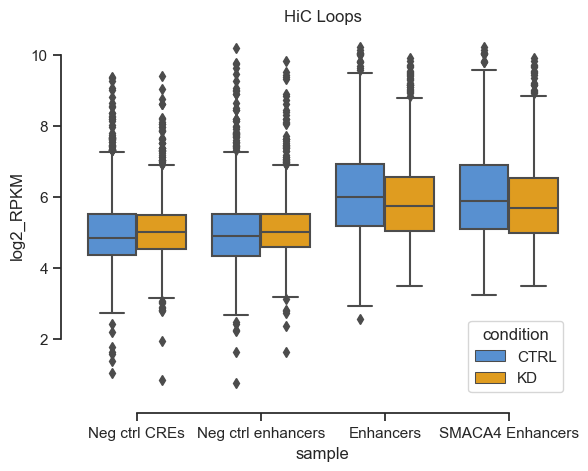

In [12]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(
	x="sample", 
	y="log2_RPKM",
	hue="condition",
	palette=my_pal,
	data=hic_final_plot
).set_title("HiC Loops")
sns.despine(offset=10, trim=True)

## HiC & Long Loops

Import the count matrices from `computeMatrix`.

In [13]:
long_nc_CREs = pd.read_csv('cux1_short_long_loops/matrix_loops_without_CREs.tab', header=0, sep='\t')
long_nc_enhancers = pd.read_csv('cux1_short_long_loops/matrix_loops_without_enhancers.tab', header=0, sep='\t')
long_enhancers = pd.read_csv('cux1_short_long_loops/matrix_enhancers.tab', header=0, sep='\t')
long_smaca4_enhancers = pd.read_csv('cux1_smaca4_short_long_loops/matrix_enhancers.tab', header=0, sep='\t')

Create a data frame from each matrix that distinguished CTRL and KD values. We size match the negative control.

In [14]:
long_enhancers_plot = pd.DataFrame({'CTRL': filterCTRL(long_enhancers),'KD': filterKD(long_enhancers)})

long_smaca4_enhancers_plot = pd.DataFrame({'CTRL': filterCTRL(long_smaca4_enhancers),'KD': filterKD(long_smaca4_enhancers)})

long_nc_CREs_plot_pre = pd.DataFrame({'CTRL': filterCTRL(long_nc_CREs),'KD': filterKD(long_nc_CREs)})
long_nc_CREs_plot = hic_nc_CREs_plot_pre.sample(n = long_enhancers_plot.shape[0])

long_nc_enhancers_plot_pre = pd.DataFrame({'CTRL': filterCTRL(long_nc_enhancers),'KD': filterKD(long_nc_enhancers)})
long_nc_enhancers_plot = long_nc_enhancers_plot_pre.sample(n = long_enhancers_plot.shape[0])

Perform statistical tests.

In [15]:
scipy.stats.ttest_ind(long_enhancers_plot['CTRL'], long_enhancers_plot['KD'])

Ttest_indResult(statistic=5.278713741399263, pvalue=1.3662970994548513e-07)

In [16]:
scipy.stats.ttest_ind(long_smaca4_enhancers_plot['CTRL'], long_smaca4_enhancers_plot['KD'])

Ttest_indResult(statistic=3.8096799239046404, pvalue=0.0001419134171466104)

In [17]:
scipy.stats.ttest_ind(long_nc_CREs_plot['CTRL'], long_nc_CREs_plot['KD'])

Ttest_indResult(statistic=1.5292635058400201, pvalue=0.126274047183579)

In [18]:
scipy.stats.ttest_ind(long_nc_enhancers_plot['CTRL'], long_nc_enhancers_plot['KD'])

Ttest_indResult(statistic=1.8199638981481059, pvalue=0.0688352800357976)

Generate the plot.

In [19]:
long_enhancers_plot['sample']='Enhancers'
long_smaca4_enhancers_plot['sample']='SMACA4 Enhancers'
long_nc_CREs_plot['sample']='Neg ctrl CREs'
long_nc_enhancers_plot['sample']='Neg ctrl enhancers'

In [20]:
long_enhancers_plot = pd.melt(long_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
long_smaca4_enhancers_plot = pd.melt(long_smaca4_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
long_nc_CREs_plot = pd.melt(long_nc_CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
long_nc_enhancers_plot = pd.melt(long_nc_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")

In [21]:
long_final_plot = long_nc_CREs_plot.append(long_nc_enhancers_plot)
long_final_plot = long_final_plot.append(long_enhancers_plot)
long_final_plot = long_final_plot.append(long_smaca4_enhancers_plot)
long_final_plot['log2_RPKM'] = np.log2(long_final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


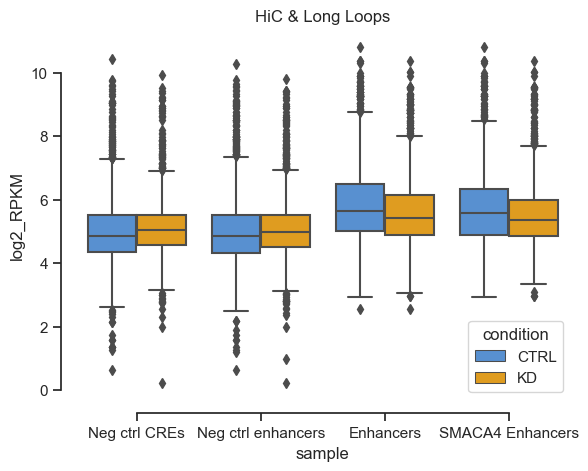

In [22]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(
	x="sample", 
	y="log2_RPKM",
	hue="condition",
	palette=my_pal,
	data=long_final_plot
).set_title("HiC & Long Loops")
sns.despine(offset=10, trim=True)